Polygon points: [(470, 106), (628, 94)]
Polygon points: [(470, 106), (628, 94), (780, 628)]
Polygon points: [(470, 106), (628, 94), (780, 628), (458, 614)]
Saved polygon coordinates: [[470 106]
 [628  94]
 [780 628]
 [458 614]]


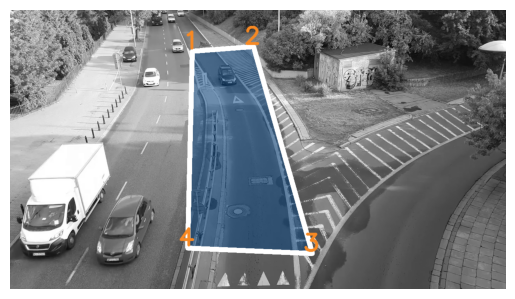

In [1]:
import cv2
import numpy as np
import supervision as sv
import matplotlib.pyplot as plt

clicked_points = []

def mouse_callback(event, x, y, flags, param):
    global clicked_points, img_copy
    
    if event == cv2.EVENT_LBUTTONDOWN:
        clicked_points.append((x, y))
        
        cv2.circle(img_copy, (x, y), 5, (0, 0, 255), -1) 
        cv2.putText(img_copy, f"({x},{y})", (x + 5, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 0), 2)

        if len(clicked_points) > 1:
            cv2.line(img_copy, clicked_points[-2], clicked_points[-1], (0, 255, 0), 2)  

        if len(clicked_points) > 1:
            cv2.line(img_copy, clicked_points[-1], clicked_points[0], (0, 255, 0), 2) 
            print("Polygon points:", clicked_points)
            
            color1 = sv.Color.from_hex("#004080")
            color2 = sv.Color.from_hex("#f78923")
            img_copy = sv.draw_filled_polygon(img_copy, np.array(clicked_points), color1, 0.5)
            img_copy = sv.draw_polygon(img_copy, np.array(clicked_points), sv.Color.WHITE, 12)
            
            for i, point in enumerate(clicked_points):
                img_copy = sv.draw_text(
                    img_copy, str(i+1), sv.Point(point[0], point[1] - 30), color2, 2, 6
                )

video_path = './asset/videoplayback.mp4'  
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

cv2.namedWindow("Frame")
cv2.setMouseCallback("Frame", mouse_callback)

while True:
    ret, frame = cap.read()
    
    if not ret:
        break  
    
    img = frame.copy()

    img = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cv2.COLOR_GRAY2BGR)

    img_copy = img.copy()
    
    cv2.imshow("Frame", img_copy)

    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):  
        break

cap.release()
cv2.destroyAllWindows()

POLYGON_COORDS = np.array(clicked_points)

print("Saved polygon coordinates:", POLYGON_COORDS)

cap = cv2.VideoCapture(video_path)
ret, img = cap.read()
cap.release()

img = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), cv2.COLOR_GRAY2BGR)

color1 = sv.Color.from_hex("#004080")
color2 = sv.Color.from_hex("#f78923")

img = sv.draw_filled_polygon(img, POLYGON_COORDS, color1, 0.5)
img = sv.draw_polygon(img, POLYGON_COORDS, sv.Color.WHITE, 12)

for i, point in enumerate(POLYGON_COORDS):
    img = sv.draw_text(
        img, str(i+1), sv.Point(point[0], point[1] - 30), color2, 2, 6
    )

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')  
plt.show()